In [ ]:
Using LDA for classification

In [ ]:
conda install -c anaconda pandas-datareader

In [1]:
from pandas_datareader import data

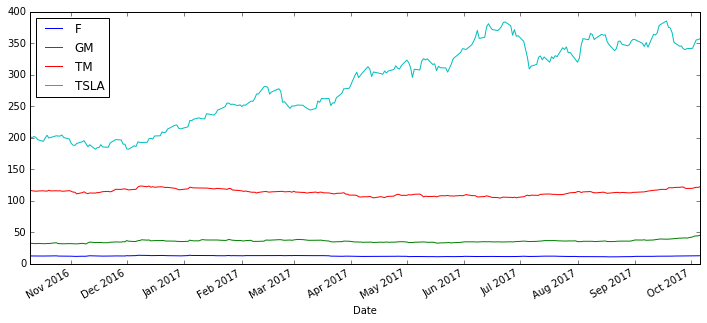

In [2]:
%matplotlib inline

from pandas_datareader import data
import pandas as pd

tickers = ["F", "TM", "GM", "TSLA"]

first_date = '2009-01-01'
last_date = '2016-12-31'


stock_panel = data.DataReader(tickers, 'google', first_date, last_date)

stock_df = stock_panel.Close.dropna()
stock_df.plot(figsize=(12, 5))

In [4]:
#this dataframe indicates if the stock was higher in 180 days
classes = (stock_df.shift(-180) > stock_df).astype(int)

X = stock_panel.to_frame()
classes = classes.unstack()
classes = classes.swaplevel(0, 1).sort_index()
classes = classes.to_frame()
classes.index.names = ['Date', 'minor']
data = X.join(classes).dropna()
data.rename(columns={0: 'is_higher'}, inplace=True)
data.head()

Open    High     Low   Close      Volume  is_higher
Date       minor                                                       
2016-10-10 F       12.35   12.38   12.10   12.12  24951437.0          0
           GM      32.31   32.60   32.12   32.15   6094808.0          1
           TM     116.13  116.83  116.06  116.42    165178.0          0
           TSLA   201.35  204.14  199.66  200.95   3316297.0          1
2016-10-11 F       12.17   12.17   11.91   11.99  40053504.0          0

In [5]:
import patsy
X = patsy.dmatrix("Open + High + Low + Close + Volume + is_higher - 1", data.reset_index(),return_type='dataframe')
X.head()

,Open,High,Low,Close,Volume,is_higher
0,12.35,12.38,12.10,12.12,24951437.0,0.0
1,32.31,32.60,32.12,32.15,6094808.0,1.0
2,116.13,116.83,116.06,116.42,165178.0,0.0
3,201.35,204.14,199.66,200.95,3316297.0,1.0
4,12.17,12.17,11.91,11.99,40053504.0,0.0


In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X.iloc[:, :-1], X.iloc[:, -1]);

In [7]:
from sklearn.metrics import classification_report
print classification_report(X.iloc[:, -1].values,
lda.predict(X.iloc[:, :-1]))

             precision    recall  f1-score   support

        0.0       0.84      0.99      0.91       845
        1.0       0.09      0.01      0.01       156

avg / total       0.73      0.84      0.77      1001

